# SKEMPI v2 Data Analysis

Dataset downloaded from https://life.bsc.es/pid/skempi2/database/index (11.06.2022)

In [1]:
import os
import pandas as pd
from abag_affinity.utils.config import read_config, get_data_paths
import matplotlib.pyplot as plt
import seaborn as sns

config = read_config("../../config.yaml")
summary_path = os.path.join(config["DATASETS"]["path"], config["DATASETS"]["SKEMPI.v2"]["folder_path"], config["DATASETS"]["SKEMPI.v2"]["summary"])

In [2]:
summary_df = pd.read_csv(summary_path, index_col=0)
summary_df["validation"] = summary_df["validation"].astype(str).apply(lambda x: x.split(".")[0] if x != "nan" else "0")
summary_df.head()

,pdb,filename,-log(Kd),chain_infos,mutation_code,validation,test
1cse-li38g,1cse,1CSE/LI38G.pdb,10.279014,"{'e': 0, 'i': 1}",IL38G,0,False
1cse-li38s,1cse,1CSE/LI38S.pdb,11.079355,"{'e': 0, 'i': 1}",IL38S,0,False
1cse-li38p,1cse,1CSE/LI38P.pdb,6.991400,"{'e': 0, 'i': 1}",IL38P,0,False
1cse-li38i,1cse,1CSE/LI38I.pdb,9.764472,"{'e': 0, 'i': 1}",IL38I,0,False
1cse-li38d,1cse,1CSE/LI38D.pdb,8.716699,"{'e': 0, 'i': 1}",IL38D,0,False


## Data Analysis

In [15]:
print("Number of unique complexes", len(summary_df["pdb"].unique()))

Number of unique complexes 100


In [16]:
print("Number of mutations", len(summary_df))

Number of mutations 1629


Distribution of mutations per complex

<AxesSubplot:xlabel='pdb', ylabel='Percent'>

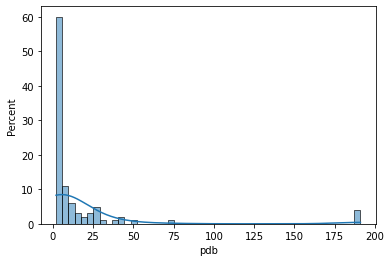

In [21]:
counts = summary_df["pdb"].value_counts()
sns.histplot(counts, kde=True, stat="percent")

## Affinity Distribution

In [3]:
summary_df["-log(Kd)"].describe()

count    1602.000000
mean        8.807563
std         1.813102
min         2.346787
25%         7.496905
50%         8.950782
75%        10.217417
max        13.657577
Name: -log(Kd), dtype: float64

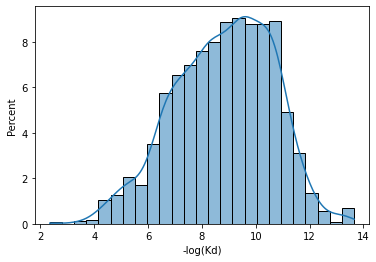

In [4]:
sns.histplot(summary_df, x="-log(Kd)", kde=True, stat="percent")
plt.savefig("./plots/skempi_-log(Kd)_distribution.png")

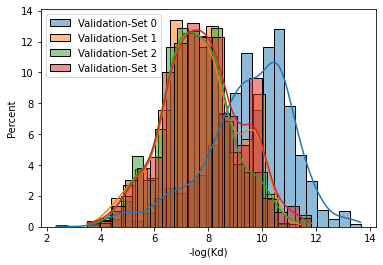

In [5]:
colors = sns.color_palette()
for i in range(4):
    val_df = summary_df[summary_df["validation"].str.contains(str(i))]
    sns.histplot(val_df, x="-log(Kd)", label=f"Validation-Set {i}", color=colors[i], kde=True, stat="percent")

plt.legend() 
plt.savefig("./plots/skempi_-log(Kd)_distribution_by_val_set.png")
plt.show()


### Relative affinity distribution

In [22]:
wt_affinity = {}
for idx, row in summary_df[summary_df["mutation_code"].isna()].iterrows():
    wt_affinity[row["pdb"]] = row["-log(Kd)"]

affinity_change_df = summary_df[~summary_df["mutation_code"].isna()].copy()
affinity_change_df["Δ -log(Kd)"] = affinity_change_df.apply(lambda row: row["-log(Kd)"] - wt_affinity[row["pdb"]], axis=1)

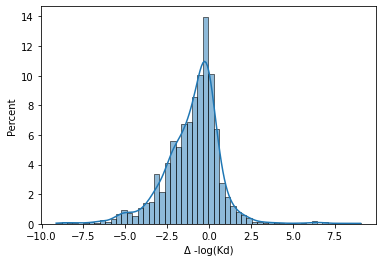

In [24]:
sns.histplot(affinity_change_df, x="Δ -log(Kd)", kde=True, stat="percent")
plt.savefig("./plots/skempi_relative_-log(Kd)_distribution.png")